<a href="https://colab.research.google.com/github/Arthur6363/Deep-Learning-ML/blob/main/m%C3%BC%C5%9Fteri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_excel("Duzeltilmis_Kitap_3.xlsx")


In [20]:
df.columns = ["RowNumber", "CustomerId", "Surname", "CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]

In [21]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [22]:
df.isnull().sum()

RowNumber          0
CustomerId         1
Surname            1
CreditScore        1
Geography          1
Gender             1
Age                1
Tenure             1
Balance            1
NumOfProducts      1
HasCrCard          1
IsActiveMember     1
EstimatedSalary    1
Exited             1
dtype: int64

In [27]:
df = df.dropna()

In [28]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [29]:
df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,1.0


In [31]:
x = df.iloc[:,3:13].values
y = df.iloc[:,13].values

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [34]:
x[:,1] = le.fit_transform(x[:,1])

In [35]:
le2 = preprocessing.LabelEncoder()
x[:,2] = le2.fit_transform(x[:,2])

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ohe = ColumnTransformer([("ohe", OneHotEncoder(dtype=float),[1])],
                        remainder = "passthrough"
                        )
x = ohe.fit_transform(x)
x= x[:,1:]

In [44]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y,random_state=63, test_size=0.30)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [47]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [48]:
x_train

array([[-0.57581067,  1.73535625,  0.19941438, ...,  0.650648  ,
        -1.03016917, -0.0162106 ],
       [-0.57581067, -0.57625055,  1.6799634 , ...,  0.650648  ,
         0.97071435,  0.57033582],
       [-0.57581067, -0.57625055,  1.06306797, ...,  0.650648  ,
         0.97071435, -1.00938824],
       ...,
       [-0.57581067,  1.73535625, -1.3119794 , ..., -1.53692933,
         0.97071435,  0.95676988],
       [-0.57581067,  1.73535625, -0.73621034, ..., -1.53692933,
         0.97071435, -1.58580259],
       [-0.57581067, -0.57625055, -0.08847015, ...,  0.650648  ,
         0.97071435,  1.65213682]])

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [52]:
model = Sequential()
model.add(Dense(6, kernel_initializer = "uniform", activation = "relu", input_dim = 11))
model.add(Dense(6, kernel_initializer = "uniform", activation = "relu"))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

In [53]:
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [54]:
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
219/219 [==============================] - 3s 4ms/step - loss: 0.5932 - accuracy: 0.7951
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4370 - accuracy: 0.7967
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4199 - accuracy: 0.8039
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4068 - accuracy: 0.8121
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8160
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8310
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8463
Epoch 8/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8540
Epoch 9/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8567
Epoch 10/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8593

In [55]:
y_pred = model.predict(x_test)

94/94 [==============================] - 0s 1ms/step


In [56]:
y_pred = (y_pred > 0.5)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

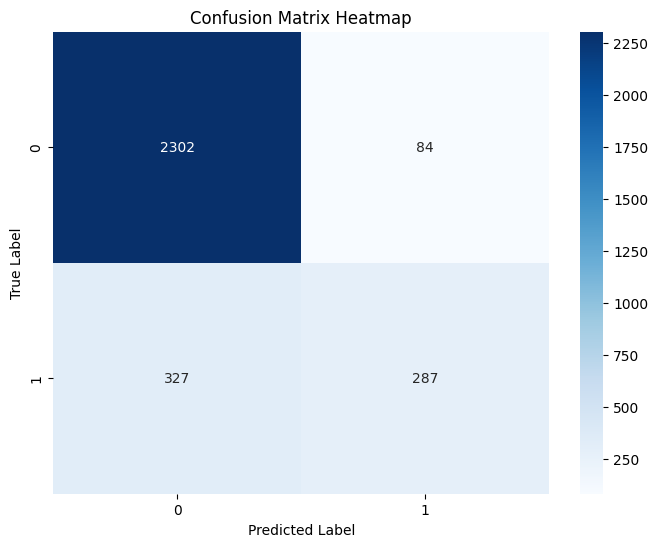

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()
